In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import env
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wrangle import wrangle_telco
import split_scale

In [2]:
df = wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges,contract_type
5348,0013-SMEOE,109.70,71,7904.25,Two year
5349,0014-BMAQU,84.65,63,5377.80,Two year
5350,0016-QLJIS,90.45,65,5957.90,Two year
5351,0017-DINOC,45.20,54,2460.55,Two year
5352,0017-IUDMW,116.80,72,8456.75,Two year


In [3]:
train, test = split_scale.split_data(df)
train.head(1), test.head(1)

(     customer_id  monthly_charges  tenure  total_charges contract_type
 5663  1971-DTCZB            90.95      72         6468.6      Two year,
      customer_id  monthly_charges  tenure  total_charges contract_type
 5653  1927-QEWMY             20.5      72        1502.25      Two year)

In [4]:
X_train, X_test, y_train, y_test = split_scale.create_train_test_variables(df)

X_train.head(1), X_test.head(1)

(      tenure
 5663      72,       tenure
 5653      72)

In [5]:
scaler, X_train_scaled, X_test_scaled = split_scale.standard_scaler(X_train, X_test)

In [6]:
df_plus_train = split_scale.merge_standard_scaled_to_original(df)
df_plus_train

,customer_id,monthly_charges,tenure,total_charges,contract_type,tenure_scaled
5348,0013-SMEOE,109.70,71,7904.25,Two year,0.785844
5349,0014-BMAQU,84.65,63,5377.80,Two year,0.334475
5350,0016-QLJIS,90.45,65,5957.90,Two year,0.447317
5351,0017-DINOC,45.20,54,2460.55,Two year,-0.173315
5352,0017-IUDMW,116.80,72,8456.75,Two year,0.842265
...,...,...,...,...,...,...
7038,9964-WBQDJ,24.40,71,1725.40,Two year,0.785844
7039,9972-EWRJS,19.25,67,1372.90,Two year,0.560159
7040,9975-GPKZU,19.75,46,856.50,Two year,-0.624684
7041,9993-LHIEB,67.85,67,4627.65,Two year,0.560159


In [7]:
def plot_variable_pairs(df, hue=None):
    """Scatterplot and regression line with Kernel Density Estimation 
    kde to estimate the probability density function"""
    
    g = sns.pairplot(df, hue=hue, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.7}})
    g.fig.suptitle("Scatterplot with Regression for Continuous Variables")
    plt.show()

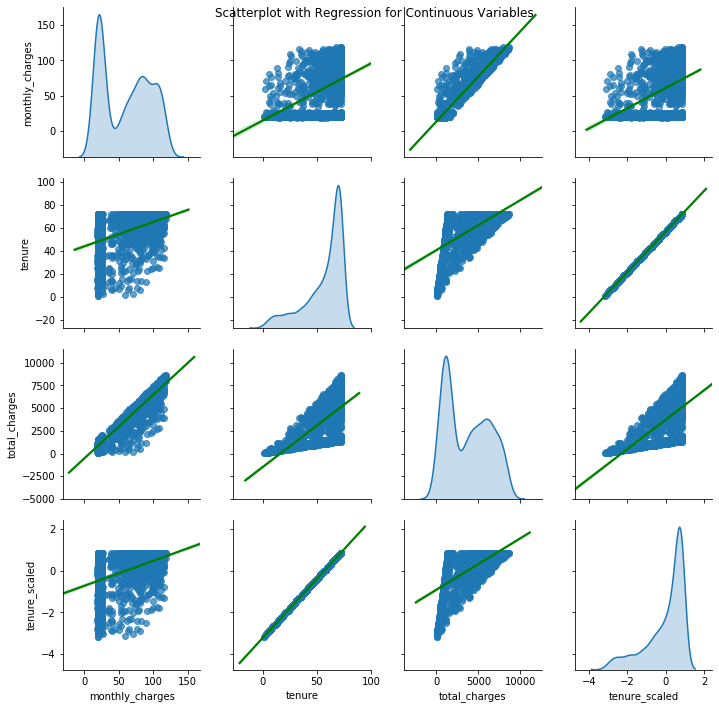

In [8]:
scatter = plot_variable_pairs(df_plus_train, hue=None)

In [9]:
df_plus_train.head()

,customer_id,monthly_charges,tenure,total_charges,contract_type,tenure_scaled
5348,0013-SMEOE,109.70,71,7904.25,Two year,0.785844
5349,0014-BMAQU,84.65,63,5377.80,Two year,0.334475
5350,0016-QLJIS,90.45,65,5957.90,Two year,0.447317
5351,0017-DINOC,45.20,54,2460.55,Two year,-0.173315
5352,0017-IUDMW,116.80,72,8456.75,Two year,0.842265


In [12]:
def months_to_years(df_plus_train):
        df["tenure_years"] = (df_plus_train['tenure'] // 12)
        return df

In [14]:
new = months_to_years(df_plus_train)
new

,customer_id,monthly_charges,tenure,total_charges,contract_type,tenure_years
5348,0013-SMEOE,109.70,71,7904.25,Two year,5
5349,0014-BMAQU,84.65,63,5377.80,Two year,5
5350,0016-QLJIS,90.45,65,5957.90,Two year,5
5351,0017-DINOC,45.20,54,2460.55,Two year,4
5352,0017-IUDMW,116.80,72,8456.75,Two year,6
...,...,...,...,...,...,...
7038,9964-WBQDJ,24.40,71,1725.40,Two year,5
7039,9972-EWRJS,19.25,67,1372.90,Two year,5
7040,9975-GPKZU,19.75,46,856.50,Two year,3
7041,9993-LHIEB,67.85,67,4627.65,Two year,5


In [19]:
new.tenure_years

5348    5
5349    5
5350    5
5351    4
5352    6
       ..
7038    5
7039    5
7040    3
7041    5
7042    5
Name: tenure_years, Length: 1685, dtype: int64

In [ ]:
def plot_categorical_and_continous_vars(categorical_var, continuous_var, df):
    sns.catplot(y=categorical_var, x=continuous_var, data=df) 
    sns.catplot(x=categorical_var, kind="count", palette="ch:.25", data=df);
    sns.catplot(x=categorical_var, y=continuous_var, kind="box", data=df);
    sns.catplot(x=categorical_var, y=continuous_var, kind="violin", bw=.15, cut=0, data=df);